In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('../housing.csv')
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
X = house.drop('median_house_value', axis=1).copy()
y = house.median_house_value

In [5]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [6]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [7]:
X_num = X.select_dtypes('float')
X_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [8]:
X_cat = X.select_dtypes('object')
X_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

### pipeline

In [14]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer()),
    ('scale', StandardScaler())
])

In [15]:
encode = OneHotEncoder()

In [16]:
num_pipeline.fit(X_num)

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [18]:
X_num_tr = num_pipeline.transform(X_num)
X_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]])

In [24]:
num_cols = num_pipeline.get_feature_names_out()
num_cols

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [25]:
X_num_tr = pd.DataFrame(X_num_tr, columns=num_cols)
X_num_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583


In [19]:
encode.fit(X_cat)

OneHotEncoder()

In [21]:
sparse_matrix = encode.transform(X_cat)
sparse_matrix

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [22]:
sparse_matrix.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [27]:
cat_cols = encode.get_feature_names_out()
cat_cols

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [28]:
X_cat_tr = pd.DataFrame(sparse_matrix.toarray(), columns=cat_cols)
X_cat_tr

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [29]:
pd.concat([X_num_tr, X_cat_tr], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,0.0,1.0,0.0,0.0,0.0


In [31]:
X_final = pd.concat([X_num_tr, X_cat_tr, X_cat], axis=1)
X_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,0.0,1.0,0.0,0.0,0.0,INLAND
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,0.0,1.0,0.0,0.0,0.0,INLAND
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,0.0,1.0,0.0,0.0,0.0,INLAND
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,0.0,1.0,0.0,0.0,0.0,INLAND


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
split

StratifiedShuffleSplit(n_splits=1, random_state=123, test_size=0.2,
            train_size=None)

In [35]:
split.split(X_final, X_final['ocean_proximity'])

<generator object BaseShuffleSplit.split at 0x0000016B0C45D240>

In [36]:
(train_idx, test_idx), = split.split(X_final, X_final['ocean_proximity'])


In [37]:
train_idx

array([ 5015,  3769,  4895, ...,  5040, 15540, 16420], dtype=int64)

In [38]:
test_idx

array([15606,  1721, 10372, ..., 17953,  4683, 20144], dtype=int64)

In [39]:
v = split.split(X_final, X_final['ocean_proximity'])
v.__next__()

(array([ 5015,  3769,  4895, ...,  5040, 15540, 16420], dtype=int64),
 array([15606,  1721, 10372, ..., 17953,  4683, 20144], dtype=int64))

In [40]:
X_train = (X_final.iloc[train_idx]).drop('ocean_proximity', axis=1)
X_test = (X_final.iloc[test_idx]).drop('ocean_proximity', axis=1)
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]


In [41]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5015,0.623766,-0.764016,1.697265,-0.204790,-0.185735,-0.290062,-0.079880,-0.743441,1.0,0.0,0.0,0.0,0.0
3769,0.568862,-0.689106,0.425936,-0.081026,-0.116565,-0.252974,-0.095573,0.086341,1.0,0.0,0.0,0.0,0.0
4895,0.663696,-0.759334,1.538349,-1.026678,-1.046783,-0.830491,-1.018883,-0.787288,1.0,0.0,0.0,0.0,0.0
7963,0.688653,-0.829562,1.061601,-0.291884,-0.254905,-0.322735,-0.262972,-0.088206,1.0,0.0,0.0,0.0,0.0
19675,-1.023365,1.651827,-1.719432,0.845374,0.567980,0.746642,0.699571,-0.032462,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,0.553888,-0.637605,0.108104,-0.485782,-0.610296,-0.372186,-0.563767,0.489968,1.0,0.0,0.0,0.0,0.0
876,-1.218026,0.902729,-1.798890,0.179796,0.572751,0.093183,0.618487,0.292260,0.0,0.0,0.0,1.0,0.0
5040,0.623766,-0.773379,1.220517,-0.544455,-0.533970,-0.498463,-0.495761,-0.858560,1.0,0.0,0.0,0.0,0.0
15540,1.212740,-1.199429,-1.322142,3.055717,2.540520,2.338787,2.627273,0.252992,1.0,0.0,0.0,0.0,0.0


In [42]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15606,1.472288,-1.297748,-0.845393,0.678063,0.737328,0.535592,0.642028,0.076445,1.0,0.0,0.0,0.0,0.0
1721,-1.407696,1.108731,0.346478,-1.188031,-1.268604,-1.238461,-1.277828,0.133873,0.0,0.0,0.0,1.0,0.0
10372,0.958183,-0.937245,-1.004309,0.344816,-0.269216,-0.026913,-0.189735,2.408931,1.0,0.0,0.0,0.0,0.0
2949,0.284357,-0.131964,0.187562,0.135333,0.424870,0.479960,0.231377,-0.871245,0.0,1.0,0.0,0.0,0.0
11342,0.818427,-0.876380,-0.924851,0.323271,0.632380,1.726831,0.851276,-0.263016,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,0.723592,-0.501831,-1.878348,1.746563,1.469577,1.767451,1.581030,0.064707,0.0,1.0,0.0,0.0,0.0
7822,0.723592,-0.806152,0.584852,-0.267131,-0.362238,-0.355408,-0.276050,-0.458302,1.0,0.0,0.0,0.0,0.0
17953,-1.203053,0.795046,0.108104,0.004234,-0.180965,0.071106,-0.051108,1.316434,1.0,0.0,0.0,0.0,0.0
4683,0.603801,-0.726561,1.856182,-0.120447,0.150575,-0.256506,0.199990,-0.365396,1.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error

In [44]:
models = [
    ('linear_regression', LinearRegression()),
    ('SGD', SGDRegressor()),
    ('Random_forest', RandomForestRegressor()),
    ('Tree', DecisionTreeRegressor()),
    ('neighbores', KNeighborsRegressor()),
    ('SVM', SVR())
]

In [45]:
def predict(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
    
        print(f"{name}")
        y_hat = model.predict(X_train)
    
        print(f"Training error: {mean_absolute_error(y_train, y_hat):.2f}")
        print(f"Training accuracy: {r2_score(y_train, y_hat):.2f}")
    
        print("_"*100)
    
        y_hat = model.predict(X_test)
    
        print(f"Testing error: {mean_absolute_error(y_test, y_hat):.2f}")
        print(f"Testing accuracy: {r2_score(y_test, y_hat):.2f}")
        print()

In [46]:
predict(models, X_train, X_test, y_train, y_test)

linear_regression
Training error: 49904.46
Training accuracy: 0.65
____________________________________________________________________________________________________
Testing error: 49650.68
Testing accuracy: 0.64

SGD
Training error: 49908.00
Training accuracy: 0.64
____________________________________________________________________________________________________
Testing error: 49706.90
Testing accuracy: 0.64

Random_forest
Training error: 11716.06
Training accuracy: 0.98
____________________________________________________________________________________________________
Testing error: 31612.19
Testing accuracy: 0.81

Tree
Training error: 0.00
Training accuracy: 1.00
____________________________________________________________________________________________________
Testing error: 43586.74
Testing accuracy: 0.64

neighbores
Training error: 33071.74
Training accuracy: 0.82
____________________________________________________________________________________________________
Testing er

### feature engineering

In [48]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
lat_long = house['latitude'] + house['longitude']
lat_long

0       -84.35
1       -84.36
2       -84.39
3       -84.40
4       -84.40
         ...  
20635   -81.61
20636   -81.72
20637   -81.79
20638   -81.89
20639   -81.87
Length: 20640, dtype: float64

In [51]:
lat_long.corr(y)

-0.49151967882957753

<Axes: ylabel='median_house_value'>

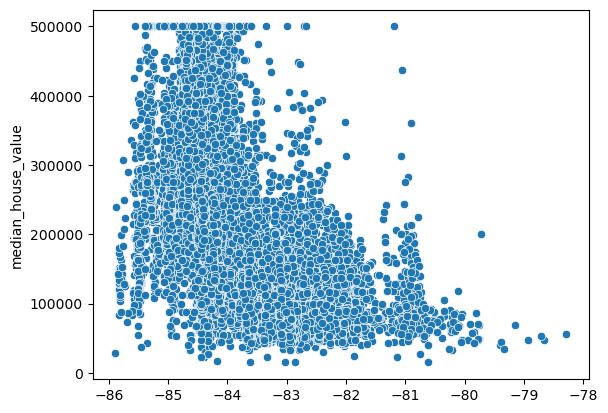

In [53]:
sns.scatterplot(x=lat_long, y=y)

In [47]:
def predict(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
    
        print(f"{name}")
        y_hat = model.predict(X_train)
    
        print(f"Training error: {mean_absolute_error(y_train, y_hat):.2f}")
        print(f"Training accuracy: {r2_score(y_train, y_hat):.2f}")
    
        print("_"*100)
    
        y_hat = model.predict(X_test)
    
        print(f"Testing error: {mean_absolute_error(y_test, y_hat):.2f}")
        print(f"Testing accuracy: {r2_score(y_test, y_hat):.2f}")
        print()

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error



house = pd.read_csv('../housing.csv')

X = house.drop('median_house_value', axis=1).copy()
y = house.median_house_value


X['lat_long'] = X['longitude'] + X['latitude']

X_num = X.select_dtypes('float')
X_cat = X.select_dtypes('object')


num_pipeline = Pipeline([
    ('impute', SimpleImputer()),
    ('scale', StandardScaler())
])

encoder = OneHotEncoder()


num_pipeline.fit(X_num)
X_num_tr = num_pipeline.transform(X_num)


num_cols = num_pipeline.get_feature_names_out()
X_num_tr = pd.DataFrame(X_num_tr, columns=num_cols)


encode.fit(X_cat)

sparse_matrix = encode.transform(X_cat)

cat_cols = encode.get_feature_names_out()

X_cat_tr = pd.DataFrame(sparse_matrix.toarray(), columns=cat_cols)


X_final = pd.concat([X_num_tr, X_cat_tr, X_cat], axis=1)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)


(train_idx, test_idx), = split.split(X_final, X_final['ocean_proximity'])


X_train = (X_final.iloc[train_idx]).drop('ocean_proximity', axis=1)
X_test = (X_final.iloc[test_idx]).drop('ocean_proximity', axis=1)
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]


models = [
    ('linear_regression', LinearRegression()),
    ('SGD', SGDRegressor()),
    ('Random_forest', RandomForestRegressor()),
    ('Tree', DecisionTreeRegressor()),
    ('neighbores', KNeighborsRegressor()),
    ('SVM', SVR())
]

if __name__ == '__main__':
    predict(models, X_train, X_test, y_train, y_test)



linear_regression
Training error: 49908.21
Training accuracy: 0.65
____________________________________________________________________________________________________
Testing error: 49654.16
Testing accuracy: 0.64

SGD
Training error: 50074.99
Training accuracy: 0.65
____________________________________________________________________________________________________
Testing error: 49858.97
Testing accuracy: 0.64

Random_forest
Training error: 11434.08
Training accuracy: 0.98
____________________________________________________________________________________________________
Testing error: 30972.35
Testing accuracy: 0.82

Tree
Training error: 0.00
Training accuracy: 1.00
____________________________________________________________________________________________________
Testing error: 42914.94
Testing accuracy: 0.65

neighbores
Training error: 31145.34
Training accuracy: 0.84
____________________________________________________________________________________________________
Testing er

In [1]:
%%writefile predict_function.py

from sklearn.metrics import r2_score, mean_absolute_error


def predict(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
    
        print(f"{name}")
        y_hat = model.predict(X_train)
    
        print(f"Training error: {mean_absolute_error(y_train, y_hat):.2f}")
        print(f"Training accuracy: {r2_score(y_train, y_hat):.2f}")
    
        print("_"*100)
    
        y_hat = model.predict(X_test)
    
        print(f"Testing error: {mean_absolute_error(y_test, y_hat):.2f}")
        print(f"Testing accuracy: {r2_score(y_test, y_hat):.2f}")
        print()

Overwriting predict_function.py
